# Genere Analysis Looking into
- differentiators between songs in different genres
- popular vs not popular in genre

In [102]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np

In [103]:
# Load in the merged data
streaming_df = pd.read_csv('/Users/joseflemker/Documents/GitHub/3250-data-analytics-template/data/finished/merged_data_finished.csv', encoding='utf-8')

Because there are so many genres we need to generalize them into groups
Rock, Metal, Indie/Alternative, Hip Hop/Rap, Pop, R&B

One thing to note is that some songs belong to more than one group so it is sorted in a way that songs get assigned by the first match in the iteration. I have ordered them in a way that makes sense to me corresponnding with research on most popular genres. This is just something to note with the analysis.

In [104]:
# Define new genre groups
genre_mapping = {
    'Pop': ['pop'],
    'Hip Hop/Rap': ['hip hop', 'rap'],
    'Rock': ['rock'],
    'Indie/Alternative': ['indie', 'alternative', 'alt'],
    'R&B': ['r&b'],
    'Folk': ['folk'],
    'Reggae': ['reggae'],
    'Dance': ['dance', 'edm', 'electro', 'house'],
    'Instrumental': ['lo-fi', 'instrumental', 'ambient'],
}

In [105]:
# Now actually i8terate through and add the new column
def map_genre(genre):
    for group, keywords in genre_mapping.items():
        if any(keyword in genre.lower() for keyword in keywords):
            return group
    return 'Other'  # Default category for unmatched genres

# Apply the mapping function to create a new column
streaming_df['genre_group'] = streaming_df['genre'].apply(map_genre)

In [106]:
# Explore average total and daily streams on a per genre basis
# Gather top 5 genres with the most songs in dfand calculate average total streams
top_track_genres = streaming_df.groupby('genre_group').agg(
        total_streams_avg = ('total_streams', 'mean'),
        daily_streams_avg = ('daily_streams', 'mean'),
        danceability_avg=('danceability', 'mean'),
        energy_avg=('energy', 'mean'),
        liveness_avg=('liveness', 'mean'),
        valence_avg=('valence', 'mean'),
        speechiness_avg=('speechiness', 'mean'),
        acousticness_avg=('acousticness', 'mean'),
        instrumentalness_avg=('instrumentalness', 'mean'),
        loudness_avg=('loudness', 'mean'),
        mode_avg=('mode', 'mean'),
        tempo_avg=('tempo', 'mean'),
        duration_ms_avg=('duration_ms', 'mean'),
        song_count=('track_name', 'count')
    ).reset_index()

In [107]:
# Remove genreless data
top_track_genres = top_track_genres[top_track_genres['genre_group'] != 'Other']

In [108]:
top_track_genres

,genre_group,total_streams_avg,daily_streams_avg,danceability_avg,energy_avg,liveness_avg,valence_avg,speechiness_avg,acousticness_avg,instrumentalness_avg,loudness_avg,mode_avg,tempo_avg,duration_ms_avg,song_count
0,Dance,1.165462e+09,5.032761e+05,0.642500,0.709812,0.207500,0.422156,0.083700,0.186932,0.057573,-5.019563,0.375000,121.637687,191349.937500,16
1,Hip Hop/Rap,1.333504e+09,5.640047e+05,0.707725,0.601059,0.199980,0.470925,0.140016,0.198349,0.001552,-6.309373,0.588235,118.032039,218058.686275,51
2,Indie/Alternative,9.999586e+08,7.629208e+05,0.574650,0.629483,0.196678,0.390610,0.067627,0.301725,0.016214,-6.927275,0.700000,124.489775,208286.400000,40
3,Instrumental,1.004913e+09,2.981060e+05,0.590000,0.229000,0.294733,0.198667,0.068800,0.839667,0.017333,-15.399667,0.666667,121.332667,183065.666667,3
5,Pop,1.243329e+09,6.022567e+05,0.631722,0.618359,0.160436,0.489338,0.061811,0.279580,0.028439,-6.485838,0.595960,119.267035,204945.393939,198
6,R&B,1.917722e+09,1.001122e+06,0.633154,0.664923,0.129685,0.411692,0.072692,0.103895,0.001218,-5.581462,0.461538,125.567846,241371.923077,13
7,Rock,1.292980e+09,7.865849e+05,0.573000,0.710426,0.186772,0.511957,0.048694,0.125014,0.014634,-6.528447,0.659574,116.470702,237982.106383,47


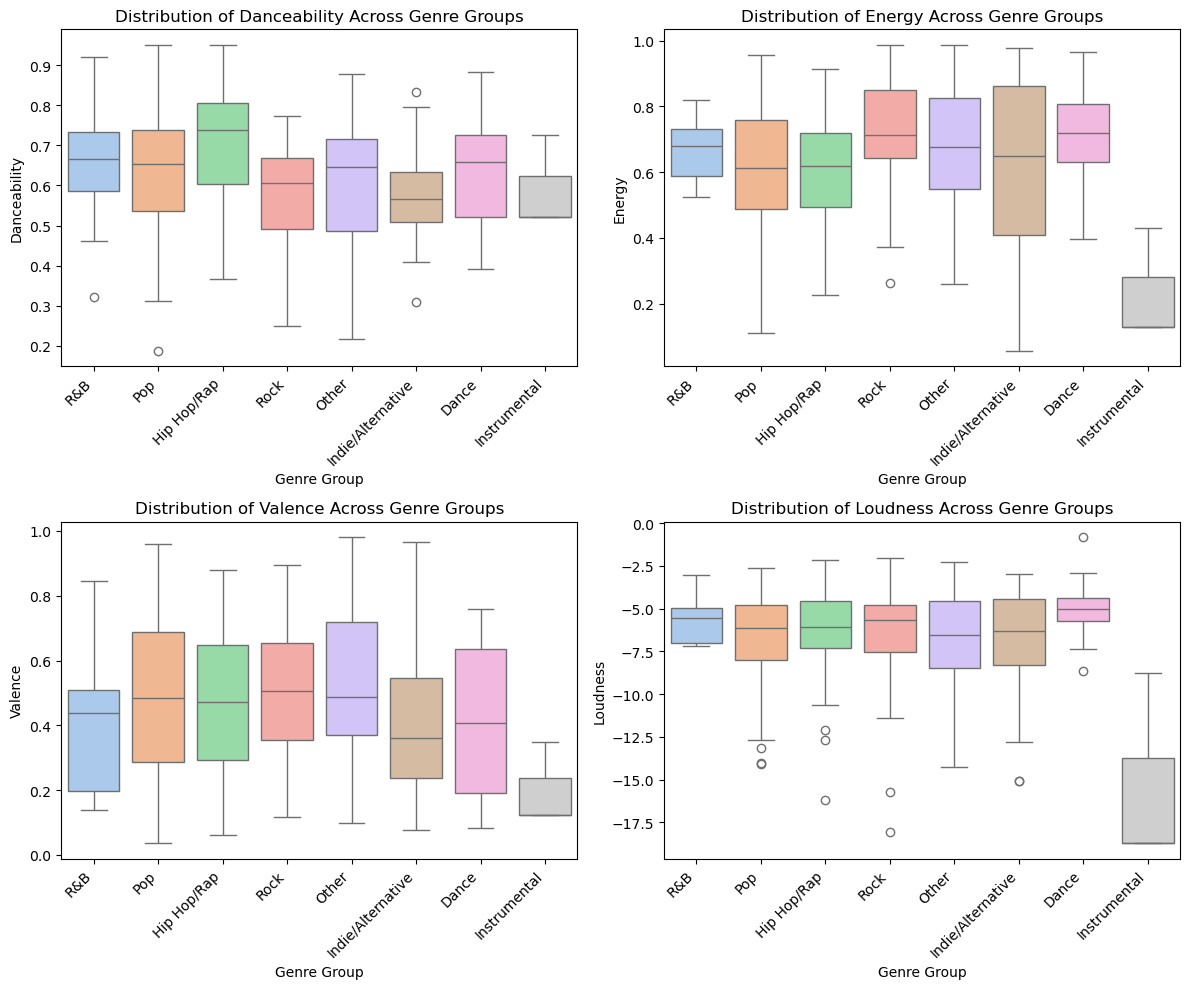

In [110]:
# Set up a grid of plots for multiple features
features = ['danceability', 'energy', 'valence', 'loudness']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, feature in enumerate(features):
    ax = axes[i//2, i%2]
    sns.boxplot(data=streaming_df, x='genre_group', y=feature, ax=ax, hue='genre_group', palette='pastel')
    ax.set_title(f'Distribution of {feature.title()} Across Genre Groups')
    ax.set_xlabel('Genre Group')
    ax.set_ylabel(feature.title())
    
    # Set tick positions and rotate the labels
    ticks = ax.get_xticks()
    ax.set_xticks(ticks)  # Ensure ticks are set first
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels

plt.tight_layout()
plt.show()



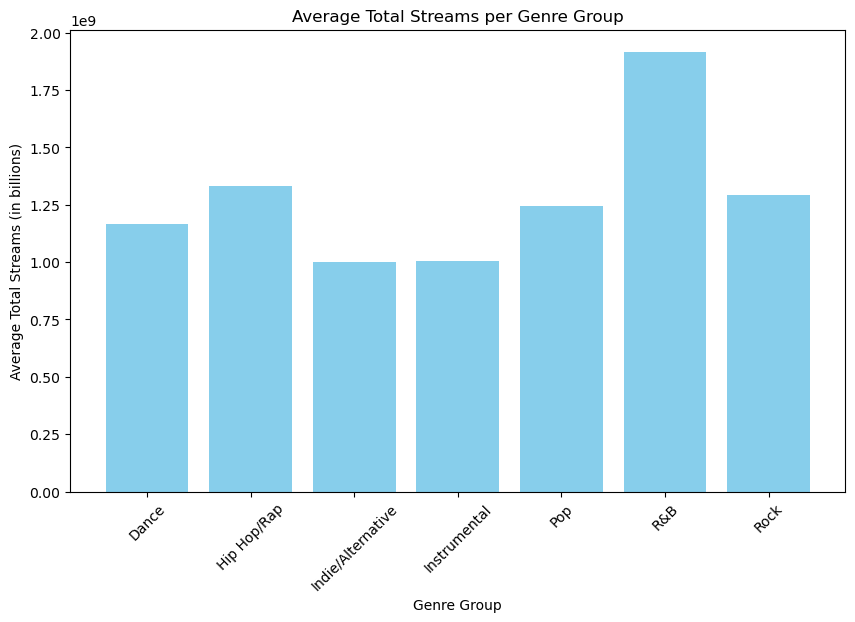

In [111]:
# Using top_track_genres dataframe
plt.figure(figsize=(10,6))
plt.bar(top_track_genres['genre_group'], top_track_genres['total_streams_avg'], color='skyblue')
plt.title('Average Total Streams per Genre Group')
plt.xlabel('Genre Group')
plt.ylabel('Average Total Streams (in billions)')
plt.xticks(rotation=45)
plt.show()

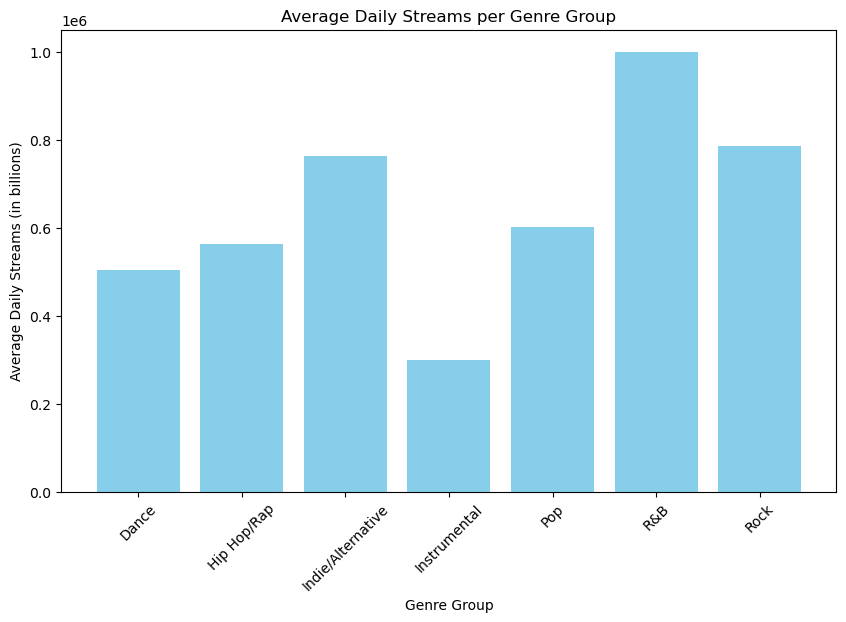

In [120]:
# Using top_track_genres dataframe
plt.figure(figsize=(10,6))
plt.bar(top_track_genres['genre_group'], top_track_genres['daily_streams_avg'], color='skyblue')
plt.title('Average Daily Streams per Genre Group')
plt.xlabel('Genre Group')
plt.ylabel('Average Daily Streams (in billions)')
plt.xticks(rotation=45)
plt.show()

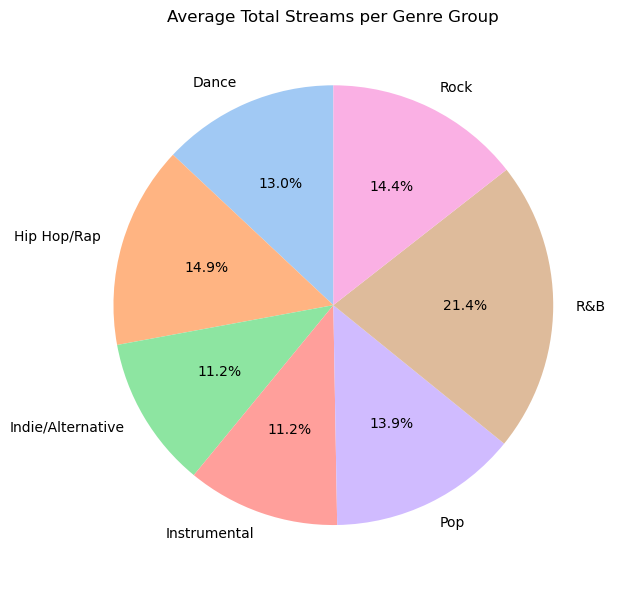

In [126]:
# Create the pie chart
plt.figure(figsize=(10,6))
plt.pie(top_track_genres['total_streams_avg'], 
        labels=top_track_genres['genre_group'], 
        autopct='%1.1f%%',  # Display percentage labels with one decimal place
        colors=sns.color_palette("pastel", len(top_track_genres)),  # Use a color palette for better visibility
        startangle=90)  # Rotate the start angle for better orientation

# Add title
plt.title('Average Total Streams per Genre Group')

# Show the pie chart
plt.tight_layout()
plt.show()

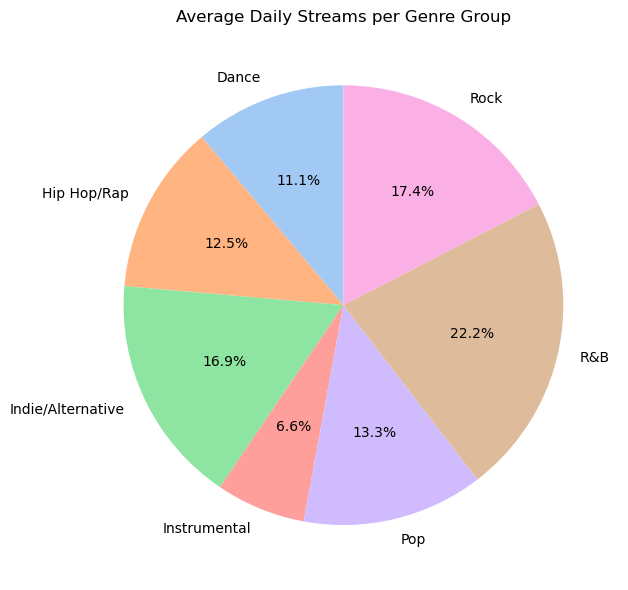

In [ ]:
# Create the pie chart
plt.figure(figsize=(10,6))
plt.pie(top_track_genres['daily_streams_avg'], 
        labels=top_track_genres['genre_group'], 
        autopct='%1.1f%%',  # Display percentage labels with one decimal place
        colors=sns.color_palette("pastel", len(top_track_genres)),  # Use a color palette for better visibility
        startangle=90)  # Rotate the start angle for better orientation

# Add title
plt.title('Average Daily Streams per Genre Group')

# Show the pie chart
plt.tight_layout()
plt.show()


In [134]:
total_streams_per_genre = streaming_df.groupby('genre_group').agg(
        total_streams_sum = ('total_streams', 'sum')
).reset_index()

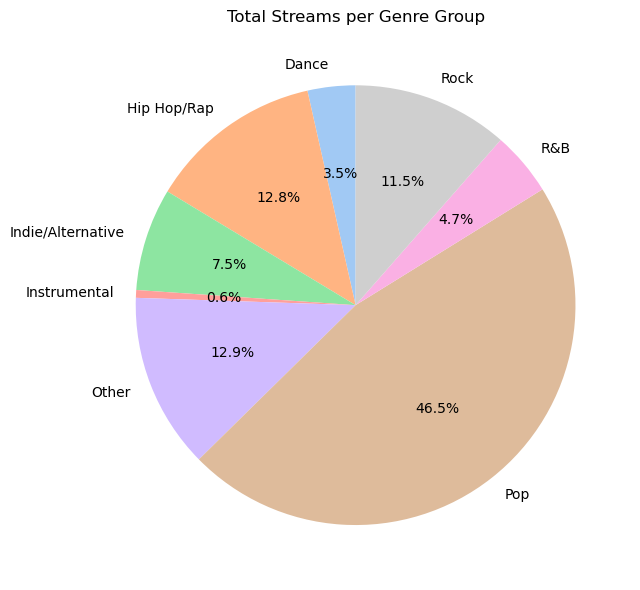

In [135]:
# Create the pie chart
plt.figure(figsize=(10,6))
plt.pie(total_streams_per_genre['total_streams_sum'], 
        labels=total_streams_per_genre['genre_group'], 
        autopct='%1.1f%%',  # Display percentage labels with one decimal place
        colors=sns.color_palette("pastel", len(total_streams_per_genre)),  # Use a color palette for better visibility
        startangle=90)  # Rotate the start angle for better orientation

# Add title
plt.title('Total Streams per Genre Group')

# Show the pie chart
plt.tight_layout()
plt.show()


In [148]:
# Take a look at most used key and time signature as well as average tempo and duration for songs on a per genre basis
top_track_genres = streaming_df.groupby('genre_group').agg(
    mode_avg=('mode', 'mean'),
    tempo_avg=('tempo', 'mean'),
    duration_ms_avg=('duration_ms', 'mean'),
    key_mode=('key', pd.Series.mode),  # Mode of 'key'
    time_signature_mode=('time_signature', pd.Series.mode),  # Mode of 'time_signature'
).reset_index()


In [149]:
# Round the numerical columns
top_track_genres[['mode_avg', 'tempo_avg', 'duration_ms_avg']] = top_track_genres[['mode_avg', 'tempo_avg', 'duration_ms_avg']].round(2)

# Format the 'duration_ms_avg' column with commas for readability
top_track_genres['duration_ms_avg'] = top_track_genres['duration_ms_avg'].apply(lambda x: "{:,}".format(int(x)))

# Sort the dataframe by tempo_avg in descending order
top_track_genres_sorted = top_track_genres.sort_values(by='tempo_avg', ascending=False)

# Display the cleaned-up results
print(top_track_genres_sorted)


         genre_group  mode_avg  tempo_avg duration_ms_avg  \
6                R&B      0.46     125.57         241,371   
2  Indie/Alternative      0.70     124.49         208,286   
4              Other      0.64     123.98         221,861   
0              Dance      0.38     121.64         191,349   
3       Instrumental      0.67     121.33         183,065   
5                Pop      0.60     119.27         204,945   
1        Hip Hop/Rap      0.59     118.03         218,058   
7               Rock      0.66     116.47         237,982   

                     key_mode         time_signature_mode  
6                         1.0                         1.0  
2  [1.0, 7.0, 8.0, 9.0, 10.0]  [1.0, 7.0, 8.0, 9.0, 10.0]  
4                  [5.0, 7.0]                  [5.0, 7.0]  
0                         1.0                         1.0  
3                         4.0                         4.0  
5                         1.0                         1.0  
1                         5.0 

In [150]:
top_track_genres_sorted

,genre_group,mode_avg,tempo_avg,duration_ms_avg,key_mode,time_signature_mode
6,R&B,0.46,125.57,"241,371",1.0,1.0
2,Indie/Alternative,0.70,124.49,"208,286","[1.0, 7.0, 8.0, 9.0, 10.0]","[1.0, 7.0, 8.0, 9.0, 10.0]"
4,Other,0.64,123.98,"221,861","[5.0, 7.0]","[5.0, 7.0]"
0,Dance,0.38,121.64,"191,349",1.0,1.0
3,Instrumental,0.67,121.33,"183,065",4.0,4.0
5,Pop,0.60,119.27,"204,945",1.0,1.0
1,Hip Hop/Rap,0.59,118.03,"218,058",5.0,5.0
7,Rock,0.66,116.47,"237,982",9.0,9.0


In [151]:
streaming_df

,track_name,artist_name,total_streams,daily_streams,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre_group
0,Blinding Lights,The Weeknd,4.560740e+09,1912741.0,canadian contemporary r&b,0.514,0.730,1.0,-5.934,1.0,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040.0,1.0,R&B
1,Shape of You,Ed Sheeran,4.096124e+09,1615655.0,pop,0.825,0.652,1.0,-3.183,0.0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,233713.0,1.0,Pop
2,Someone You Loved,Lewis Capaldi,3.671557e+09,1475856.0,pop,0.501,0.405,1.0,-5.679,1.0,0.0319,0.75100,0.000000,0.1050,0.446,109.891,182161.0,1.0,Pop
3,As It Was,Harry Styles,3.631721e+09,1533219.0,pop,0.520,0.731,6.0,-5.338,0.0,0.0557,0.34200,0.001010,0.3110,0.662,173.930,167303.0,6.0,Pop
4,Starboy,The Weeknd,3.580695e+09,1852199.0,canadian contemporary r&b,0.679,0.587,7.0,-7.015,1.0,0.2760,0.14100,0.000006,0.1370,0.486,186.003,230453.0,7.0,R&B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,I Lived,OneRepublic,5.257956e+08,248632.0,piano rock,0.599,0.854,9.0,-5.429,1.0,0.0436,0.07460,0.000000,0.2780,0.311,119.986,234547.0,9.0,Rock
425,this is what falling in love feels like,JVKE,5.254822e+08,327597.0,modern indie pop,0.422,0.440,11.0,-5.530,1.0,0.0544,0.61700,0.000000,0.0837,0.332,128.934,120308.0,11.0,Pop
426,BURN IT DOWN,Linkin Park,5.239371e+08,411360.0,alternative metal,0.585,0.972,9.0,-4.450,0.0,0.0534,0.01430,0.000000,0.0707,0.585,110.006,230253.0,9.0,Indie/Alternative
427,SUGAR,BROCKHAMPTON,5.232683e+08,103212.0,boy band,0.453,0.538,1.0,-8.212,1.0,0.0638,0.44900,0.000000,0.1900,0.516,122.973,204533.0,1.0,Other
